In [1]:
# Importing necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
'''Task 1'''
# Define the stock symbols for 5 Nifty 50 stocks
stocks = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS', 'ITC.NS']

# Fetch historical data for the last 6 months
data = yf.download(stocks, period='6mo')

# Extract the 'Close' prices
close_prices = data['Close']

[*********************100%***********************]  5 of 5 completed


In [3]:
data.head()

Price                        Adj Close                                        \
Ticker                     HDFCBANK.NS      INFY.NS      ITC.NS  RELIANCE.NS   
Date                                                                           
2024-03-18 00:00:00+00:00  1426.569580  1580.195312  410.174835  2869.211914   
2024-03-19 00:00:00+00:00  1429.825073  1539.572388  402.412476  2840.858154   
2024-03-20 00:00:00+00:00  1411.771729  1533.163452  408.455322  2877.732910   
2024-03-21 00:00:00+00:00  1426.273560  1532.916992  413.908600  2892.134033   
2024-03-22 00:00:00+00:00  1423.412598  1487.709473  421.130493  2900.206787   

Price                                         Close                           \
Ticker                          TCS.NS  HDFCBANK.NS      INFY.NS      ITC.NS   
Date                                                                           
2024-03-18 00:00:00+00:00  4112.983887  1446.050049  1602.650024  417.450012   
2024-03-19 00:00:00+00:00  3939.451416  1449.349976  1561.449951  409.549988   
2024-03-20 00:00:00+00:00  3933.111816  1431.050049  1554.949951  415.700012   
2024-03-21 00:00:00+00:00  3935.142578  1445.750000  1554.699951  421.250000   
2024-03-22 00:00:00+00:00  3873.683105  1442.849976  1508.849976  428.600006   

Price                                                ...         Open  \
Ticker                     RELIANCE.NS       TCS.NS  ...  HDFCBANK.NS   
Date                                                 ...                
2024-03-18 00:00:00+00:00  2878.949951  4152.500000  ...  1447.000000   
2024-03-19 00:00:00+00:00  2850.500000  3977.300049  ...  1435.500000   
2024-03-20 00:00:00+00:00  2887.500000  3970.899902  ...  1449.050049   
2024-03-21 00:00:00+00:00  2901.949951  3972.949951  ...  1442.599976   
2024-03-22 00:00:00+00:00  2910.050049  3910.899902  ...  1441.000000   

Price                                                                     \
Ticker                         INFY.NS  ITC.NS  RELIANCE.NS       TCS.NS   
Date                                                                       
2024-03-18 00:00:00+00:00  1630.000000  419.00  2840.000000  4215.250000   
2024-03-19 00:00:00+00:00  1592.349976  418.00  2857.500000  4051.250000   
2024-03-20 00:00:00+00:00  1563.000000  410.00  2855.899902  3986.000000   
2024-03-21 00:00:00+00:00  1564.000000  419.00  2905.050049  3990.050049   
2024-03-22 00:00:00+00:00  1521.000000  421.25  2899.949951  3897.000000   

Price                          Volume                                           
Ticker                    HDFCBANK.NS   INFY.NS    ITC.NS RELIANCE.NS   TCS.NS  
Date                                                                            
2024-03-18 00:00:00+00:00    10718928   4958904  15933704     4584696  1526904  
2024-03-19 00:00:00+00:00    18091797   6870411  20994563     4137882  8931209  
2024-03-20 00:00:00+00:00    21803047   4759059  19609321     4244403  1817913  
2024-03-21 00:00:00+00:00    14461430  11062497  19227982     6503468  3829582  
2024-03-22 00:00:00+00:00    22990163  14673890  38861818     9763804  5852485  

[5 rows x 30 columns]

In [4]:
# 1.2.a. Calculate daily percentage change for each stock
daily_pct_change = close_prices.pct_change() * 100
daily_pct_change.head()

Ticker,HDFCBANK.NS,INFY.NS,ITC.NS,RELIANCE.NS,TCS.NS
Date,,,,,
2024-03-18 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2024-03-19 00:00:00+00:00,0.228203,-2.570747,-1.892448,-0.988206,-4.219144
2024-03-20 00:00:00+00:00,-1.262630,-0.416280,1.501654,1.298018,-0.160917
2024-03-21 00:00:00+00:00,1.027214,-0.016078,1.335094,0.500431,0.051627
2024-03-22 00:00:00+00:00,-0.200590,-2.949121,1.744809,0.279126,-1.561813


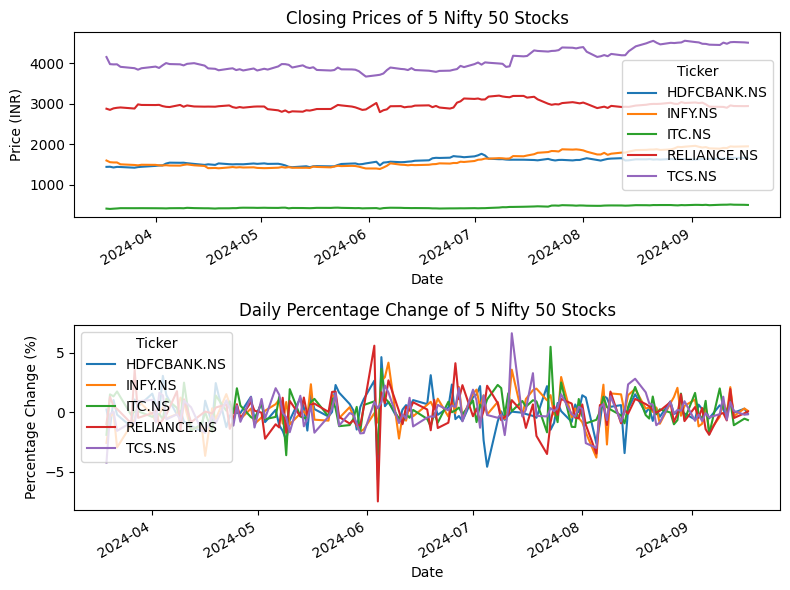

In [5]:
# 1.2.b. Plot closing prices and daily percentage changes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,6))
# Plotting Closing Prices
close_prices.plot(ax=ax1, title="Closing Prices of 5 Nifty 50 Stocks")
ax1.set_ylabel('Price (INR)')

# Plotting Daily Percentage Change
daily_pct_change.plot(ax=ax2, title="Daily Percentage Change of 5 Nifty 50 Stocks")
ax2.set_ylabel('Percentage Change (%)')


plt.tight_layout()
plt.show()

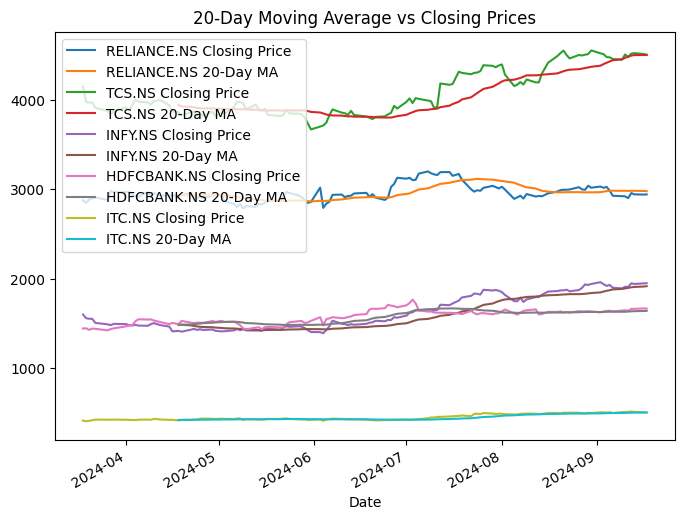

In [6]:
# 1.2.c. Calculate the 20-day moving average and plot it against the stock's closing price
for stock in stocks:
    close_prices[stock].plot(label=f'{stock} Closing Price', figsize=(8,6))
    close_prices[stock].rolling(window=20).mean().plot(label=f'{stock} 20-Day MA')

plt.title("20-Day Moving Average vs Closing Prices")
plt.legend()
plt.show()

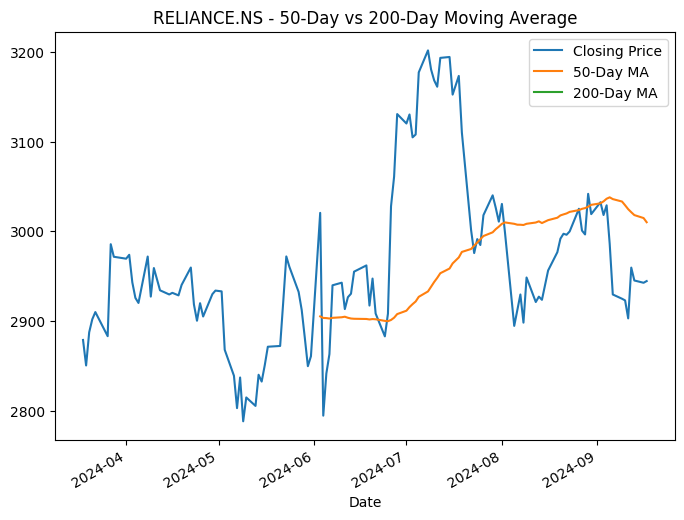

In [10]:
'''Task 2'''
# Choosing 'RELIANCE.NS' for the strategy
stock = 'RELIANCE.NS'

# Calculate the 50-day and 200-day moving averages
data['50_MA'] = close_prices[stock].rolling(window=50).mean()
data['200_MA'] = close_prices[stock].rolling(window=200).mean()

# 2.1 Plot the stock price with the two moving averages
close_prices[stock].plot(label='Closing Price', figsize=(8,6))
data['50_MA'].plot(label='50-Day MA')
data['200_MA'].plot(label='200-Day MA')
plt.title(f"{stock} - 50-Day vs 200-Day Moving Average")
plt.legend()
plt.show()

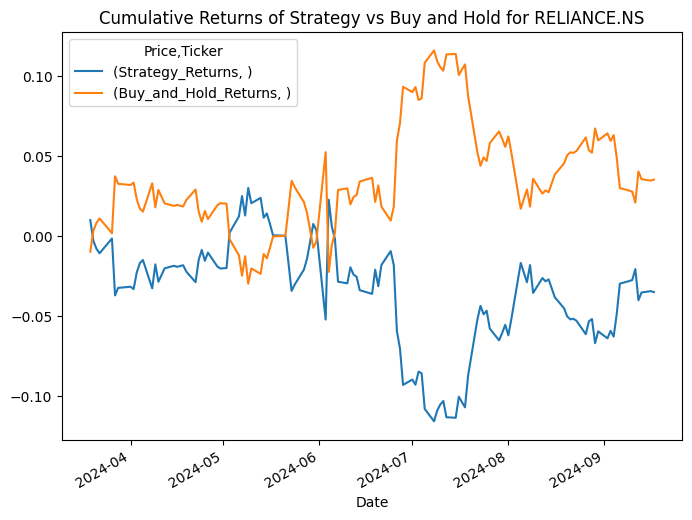

In [8]:
# 2.2. Backtest the strategy
# Buy when the 50-day MA crosses above the 200-day MA (bullish signal)
# Sell when the 50-day MA crosses below the 200-day MA (bearish signal)

data['Signal'] = 0  # No position initially
data['Signal'] = np.where(data['50_MA'] > data['200_MA'], 1, -1)  # 1 for Buy, -1 for Sell

# Shifting the signals to align with future returns
data['Position'] = data['Signal'].shift()

# Calculate the returns from the strategy
data['Strategy_Returns'] = data['Position'] * close_prices[stock].pct_change()

# 2.3 Calculate buy-and-hold returns
data['Buy_and_Hold_Returns'] = close_prices[stock].pct_change()

# Plot the cumulative returns
data[['Strategy_Returns', 'Buy_and_Hold_Returns']].cumsum().plot(figsize=(8,6), title=f"Cumulative Returns of Strategy vs Buy and Hold for {stock}")
plt.show()